In [338]:
#import necessary library
import pandas as pd
import requests
import csv
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup #For data scrapping

# Data Exploration

In [339]:
#importing necessary library
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # Apply the default seaborn theme, scaling, and color palette

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [340]:
df = pd.read_csv("covid_update.csv")

In [341]:
df.head(10)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\r\n1M pop\r\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
0,NaN,\r\nNorth America\r\n,"3,249,522","+10,032","171,323",+894,"1,422,418","+4,219","1,655,781","19,003",NaN,NaN,NaN,NaN,NaN,North America,\r\n,NaN,NaN
1,NaN,\r\nSouth America\r\n,"2,303,508","+4,608","87,179",+190,"1,450,628","+90,851","765,701","12,892",NaN,NaN,NaN,NaN,NaN,South America,\r\n,NaN,NaN
2,NaN,\r\nEurope\r\n,"2,467,078","+10,355","192,369",+247,"1,396,762","+9,839","877,947","5,657",NaN,NaN,NaN,NaN,NaN,Europe,\r\n,NaN,NaN
3,NaN,\r\nAsia\r\n,"2,396,454","+28,068","58,501",+567,"1,586,382","+26,564","751,571","19,506",NaN,NaN,NaN,NaN,NaN,Asia,\r\n,NaN,NaN
4,NaN,\r\nAfrica\r\n,"422,343",+961,"10,451",+8,"201,701",+706,"210,191",916,NaN,NaN,NaN,NaN,NaN,Africa,\r\n,NaN,NaN
5,NaN,\r\nOceania\r\n,"9,643",+83,126,NaN,"8,687",+56,830,6,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,\r\n,NaN,NaN
6,NaN,\r\n\r\n,721,NaN,15,NaN,651,NaN,55,4,NaN,NaN,NaN,NaN,NaN,NaN,\r\n,NaN,NaN
7,NaN,World,"10,849,269","+54,107","519,964","+1,906","6,067,229","+132,235","4,262,076","57,984","1,392",66.7,NaN,NaN,NaN,All,\r\n,NaN,NaN
8,1.0,USA,"2,782,346","+2,393","130,851",+53,"1,165,179",+499,"1,486,316","15,898","8,406",395,"34,892,789","105,414","331,007,570",North America,119,"2,530",9
9,2.0,Brazil,"1,456,969","+3,600","60,813",+100,"916,147","+89,281","480,009","8,318","6,854",286,"3,227,591","15,184","212,562,300",South America,146,"3,495",66


At first we need to name our features in a meaningful and authentic way. 

In [342]:
df.columns = ['#','Country','TotalCases','NewCases','TotalDeaths','NewDeaths','TotalRecovered','NewRecovered','ActiveCases','SeriousCritical','TotalCasesPerMillion','DeathsPerMillion','TotalTests','TestsPerMillion','Population','Continent','CaseEvery','DeathEvery','TestEvery']
df.head()

,#,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotalCasesPerMillion,DeathsPerMillion,TotalTests,TestsPerMillion,Population,Continent,CaseEvery,DeathEvery,TestEvery
0,NaN,\r\nNorth America\r\n,"3,249,522","+10,032","171,323",+894,"1,422,418","+4,219","1,655,781","19,003",NaN,NaN,NaN,NaN,NaN,North America,\r\n,NaN,NaN
1,NaN,\r\nSouth America\r\n,"2,303,508","+4,608","87,179",+190,"1,450,628","+90,851","765,701","12,892",NaN,NaN,NaN,NaN,NaN,South America,\r\n,NaN,NaN
2,NaN,\r\nEurope\r\n,"2,467,078","+10,355","192,369",+247,"1,396,762","+9,839","877,947","5,657",NaN,NaN,NaN,NaN,NaN,Europe,\r\n,NaN,NaN
3,NaN,\r\nAsia\r\n,"2,396,454","+28,068","58,501",+567,"1,586,382","+26,564","751,571","19,506",NaN,NaN,NaN,NaN,NaN,Asia,\r\n,NaN,NaN
4,NaN,\r\nAfrica\r\n,"422,343",+961,"10,451",+8,"201,701",+706,"210,191",916,NaN,NaN,NaN,NaN,NaN,Africa,\r\n,NaN,NaN


We've seen some columns are not that much rellivent. We'll reduce those columns

In [343]:
df = df.drop(['#','CaseEvery','DeathEvery','TestEvery'], axis=1)
df.head(10)

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotalCasesPerMillion,DeathsPerMillion,TotalTests,TestsPerMillion,Population,Continent
0,\r\nNorth America\r\n,"3,249,522","+10,032","171,323",+894,"1,422,418","+4,219","1,655,781","19,003",NaN,NaN,NaN,NaN,NaN,North America
1,\r\nSouth America\r\n,"2,303,508","+4,608","87,179",+190,"1,450,628","+90,851","765,701","12,892",NaN,NaN,NaN,NaN,NaN,South America
2,\r\nEurope\r\n,"2,467,078","+10,355","192,369",+247,"1,396,762","+9,839","877,947","5,657",NaN,NaN,NaN,NaN,NaN,Europe
3,\r\nAsia\r\n,"2,396,454","+28,068","58,501",+567,"1,586,382","+26,564","751,571","19,506",NaN,NaN,NaN,NaN,NaN,Asia
4,\r\nAfrica\r\n,"422,343",+961,"10,451",+8,"201,701",+706,"210,191",916,NaN,NaN,NaN,NaN,NaN,Africa
5,\r\nOceania\r\n,"9,643",+83,126,NaN,"8,687",+56,830,6,NaN,NaN,NaN,NaN,NaN,Australia/Oceania
6,\r\n\r\n,721,NaN,15,NaN,651,NaN,55,4,NaN,NaN,NaN,NaN,NaN,NaN
7,World,"10,849,269","+54,107","519,964","+1,906","6,067,229","+132,235","4,262,076","57,984","1,392",66.7,NaN,NaN,NaN,All
8,USA,"2,782,346","+2,393","130,851",+53,"1,165,179",+499,"1,486,316","15,898","8,406",395,"34,892,789","105,414","331,007,570",North America
9,Brazil,"1,456,969","+3,600","60,813",+100,"916,147","+89,281","480,009","8,318","6,854",286,"3,227,591","15,184","212,562,300",South America


The First 8 Rows data is continantal data. We will deal with only countries data. So We're going to delete first 8 row from this dataset. 

In [344]:
df = df.iloc[8:]
df.head()


,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotalCasesPerMillion,DeathsPerMillion,TotalTests,TestsPerMillion,Population,Continent
8,USA,"2,782,346","+2,393","130,851",+53,"1,165,179",+499,"1,486,316","15,898","8,406",395,"34,892,789","105,414","331,007,570",North America
9,Brazil,"1,456,969","+3,600","60,813",+100,"916,147","+89,281","480,009","8,318","6,854",286,"3,227,591","15,184","212,562,300",South America
10,Russia,"661,165","+6,760","9,683",+147,"428,978","+6,047","222,504","2,300","4,531",66,"20,168,904","138,205","145,934,790",Europe
11,India,"607,344","+2,124","17,873",+25,"361,108","+1,212","228,363","8,944",440,13,"9,056,173","6,562","1,380,011,546",Asia
12,UK,"313,483",NaN,"43,906",NaN,NaN,NaN,NaN,238,"4,618",647,"9,662,051","142,325","67,887,024",Europe


We can see the index start from 8. So we're going to reset the index number.

In [345]:
df = df.reset_index(drop=True)
df.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotalCasesPerMillion,DeathsPerMillion,TotalTests,TestsPerMillion,Population,Continent
0,USA,"2,782,346","+2,393","130,851",+53,"1,165,179",+499,"1,486,316","15,898","8,406",395,"34,892,789","105,414","331,007,570",North America
1,Brazil,"1,456,969","+3,600","60,813",+100,"916,147","+89,281","480,009","8,318","6,854",286,"3,227,591","15,184","212,562,300",South America
2,Russia,"661,165","+6,760","9,683",+147,"428,978","+6,047","222,504","2,300","4,531",66,"20,168,904","138,205","145,934,790",Europe
3,India,"607,344","+2,124","17,873",+25,"361,108","+1,212","228,363","8,944",440,13,"9,056,173","6,562","1,380,011,546",Asia
4,UK,"313,483",NaN,"43,906",NaN,NaN,NaN,NaN,238,"4,618",647,"9,662,051","142,325","67,887,024",Europe


In [346]:
#Data discription
df.describe()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotalCasesPerMillion,DeathsPerMillion,TotalTests,TestsPerMillion,Population,Continent
count,223,223,88,223,52,218,79,219,138,214,184,192,192,215,220
unique,216,215,71,142,30,203,67,177,77,200,97,192,192,214,7
top,Total:,11,+5,,+1,19,+23,0,1,80,3,454,"287,451",,Africa
freq,8,2,5,30,9,3,4,25,23,3,11,1,1,2,58


From this Description We got some interesting instinct. <br>
### 1: Tatal affected countries = 215 
### 2: Most affectected Continent = Africa
### 3: Total affect countries in Africa = 58

In [347]:
df.shape

(223, 15)

Total number of rows are 223

In [348]:
df.tail(10)

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotalCasesPerMillion,DeathsPerMillion,TotalTests,TestsPerMillion,Population,Continent
213,Saint Pierre Miquelon,1,NaN,,NaN,1,NaN,0,NaN,173,NaN,NaN,NaN,"5,794",North America
214,China,"83,537",+3,"4,634",NaN,"78,487",+8,416,7,58,3,"90,410,000","62,814","1,439,323,776",Asia
215,Total:,"3,249,522","+10,032","171,323",+894,"1,422,418","+4,219","1,655,781","19,003",NaN,NaN,NaN,NaN,NaN,North America
216,Total:,"2,303,508","+4,608","87,179",+190,"1,450,628","+90,851","765,701","12,892",NaN,NaN,NaN,NaN,NaN,South America
217,Total:,"2,467,078","+10,355","192,369",+247,"1,396,762","+9,839","877,947","5,657",NaN,NaN,NaN,NaN,NaN,Europe
218,Total:,"2,396,454","+28,068","58,501",+567,"1,586,382","+26,564","751,571","19,506",NaN,NaN,NaN,NaN,NaN,Asia
219,Total:,"422,343",+961,"10,451",+8,"201,701",+706,"210,191",916,NaN,NaN,NaN,NaN,NaN,Africa
220,Total:,"9,643",+83,126,NaN,"8,687",NaN,830,6,NaN,NaN,NaN,NaN,NaN,Australia/Oceania
221,Total:,721,NaN,15,NaN,651,NaN,55,4,NaN,NaN,NaN,NaN,NaN,NaN
222,Total:,"10,849,269","+54,107","519,964","+1,906","6,067,229","+132,235","4,262,076","57,984","1,391.9",66.7,NaN,NaN,NaN,All


In [349]:
df = df.drop(df.index[215:222])
df = df.reset_index(drop=True)
df.tail()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotalCasesPerMillion,DeathsPerMillion,TotalTests,TestsPerMillion,Population,Continent
211,St. Barth,6,NaN,,NaN,6,NaN,0,NaN,607,NaN,152,"15,389","9,877",North America
212,Anguilla,3,NaN,,NaN,3,NaN,0,NaN,200,NaN,272,"18,130","15,003",North America
213,Saint Pierre Miquelon,1,NaN,,NaN,1,NaN,0,NaN,173,NaN,NaN,NaN,"5,794",North America
214,China,"83,537",+3,"4,634",NaN,"78,487",+8,416,7,58,3,"90,410,000","62,814","1,439,323,776",Asia
215,Total:,"10,849,269","+54,107","519,964","+1,906","6,067,229","+132,235","4,262,076","57,984","1,391.9",66.7,NaN,NaN,NaN,All


Deleted unnecessary rows.

In [350]:
df.replace(np.NaN, 'f', regex=True)
df.tail()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotalCasesPerMillion,DeathsPerMillion,TotalTests,TestsPerMillion,Population,Continent
211,St. Barth,6,NaN,,NaN,6,NaN,0,NaN,607,NaN,152,"15,389","9,877",North America
212,Anguilla,3,NaN,,NaN,3,NaN,0,NaN,200,NaN,272,"18,130","15,003",North America
213,Saint Pierre Miquelon,1,NaN,,NaN,1,NaN,0,NaN,173,NaN,NaN,NaN,"5,794",North America
214,China,"83,537",+3,"4,634",NaN,"78,487",+8,416,7,58,3,"90,410,000","62,814","1,439,323,776",Asia
215,Total:,"10,849,269","+54,107","519,964","+1,906","6,067,229","+132,235","4,262,076","57,984","1,391.9",66.7,NaN,NaN,NaN,All


In [351]:
df.columns

Index(['Country', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'NewRecovered', 'ActiveCases', 'SeriousCritical',
       'TotalCasesPerMillion', 'DeathsPerMillion', 'TotalTests',
       'TestsPerMillion', 'Population', 'Continent'],
      dtype='object')

In [352]:
df.dtypes

Country                 object
TotalCases              object
NewCases                object
TotalDeaths             object
NewDeaths               object
TotalRecovered          object
NewRecovered            object
ActiveCases             object
SeriousCritical         object
TotalCasesPerMillion    object
DeathsPerMillion        object
TotalTests              object
TestsPerMillion         object
Population              object
Continent               object
dtype: object

In [353]:
df.isna().sum()

Country                   0
TotalCases                0
NewCases                134
TotalDeaths               0
NewDeaths               169
TotalRecovered            5
NewRecovered            142
ActiveCases               4
SeriousCritical          85
TotalCasesPerMillion      2
DeathsPerMillion         32
TotalTests               24
TestsPerMillion          24
Population                1
Continent                 2
dtype: int64

A lot of Null values are present here

In [354]:
df.head(5)

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotalCasesPerMillion,DeathsPerMillion,TotalTests,TestsPerMillion,Population,Continent
0,USA,"2,782,346","+2,393","130,851",+53,"1,165,179",+499,"1,486,316","15,898","8,406",395,"34,892,789","105,414","331,007,570",North America
1,Brazil,"1,456,969","+3,600","60,813",+100,"916,147","+89,281","480,009","8,318","6,854",286,"3,227,591","15,184","212,562,300",South America
2,Russia,"661,165","+6,760","9,683",+147,"428,978","+6,047","222,504","2,300","4,531",66,"20,168,904","138,205","145,934,790",Europe
3,India,"607,344","+2,124","17,873",+25,"361,108","+1,212","228,363","8,944",440,13,"9,056,173","6,562","1,380,011,546",Asia
4,UK,"313,483",NaN,"43,906",NaN,NaN,NaN,NaN,238,"4,618",647,"9,662,051","142,325","67,887,024",Europe


In [355]:
cols = []
for col in df.columns:
    cols.append(col)
cols.remove('Country')
cols.remove('Continent')
cols

['TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'SeriousCritical',
 'TotalCasesPerMillion',
 'DeathsPerMillion',
 'TotalTests',
 'TestsPerMillion',
 'Population']

Categorized the numerical columns to fill the null values of those columns by their median

In [356]:
for col in cols:
    df[col] = df[col].str.replace(',','')
    df[col] = df[col].str.replace('+','')
    df[col] = df[col].str.replace(" ",'')
    df[col] = pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(),inplace=True)
df.isna().sum()

Country                 0
TotalCases              0
NewCases                0
TotalDeaths             0
NewDeaths               0
TotalRecovered          0
NewRecovered            0
ActiveCases             0
SeriousCritical         0
TotalCasesPerMillion    0
DeathsPerMillion        0
TotalTests              0
TestsPerMillion         0
Population              0
Continent               2
dtype: int64

Null values are fixed. But **Continent** column has 2 null values.

In [357]:
print(df[df["Continent"].isnull()]['Country'])

142    Diamond Princess
208          MS Zaandam
Name: Country, dtype: object


These are not under any Continent. Found out these are ships. 

In [358]:
df.dtypes

Country                  object
TotalCases                int64
NewCases                float64
TotalDeaths             float64
NewDeaths               float64
TotalRecovered          float64
NewRecovered            float64
ActiveCases             float64
SeriousCritical         float64
TotalCasesPerMillion    float64
DeathsPerMillion        float64
TotalTests              float64
TestsPerMillion         float64
Population              float64
Continent                object
dtype: object

After fixing the null values we have got the columns as desired data data type.

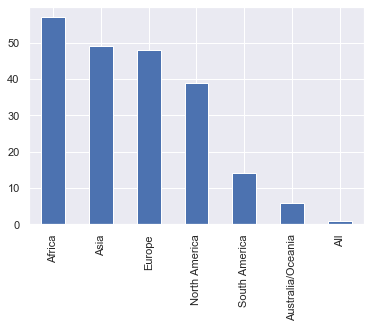

In [359]:
plot = df["Continent"].value_counts().plot(kind="bar")

**Africa** has the most countries infected with this virus.

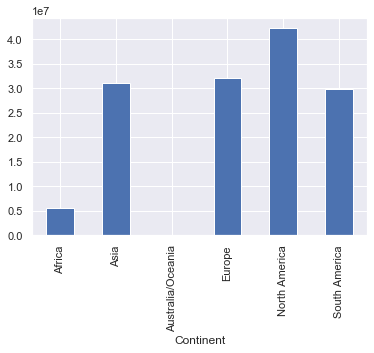

In [400]:
TCC = df.melt(['TotalCases','Continent']).groupby('Continent').TotalCases.sum().drop('All').plot(kind='bar')

But from here we can see that although countries of **Africa** are most infected but most cases are in **North America**. And **Australia** is in the safest pposition.